In [2]:
import cv2

def detect_faces(image_path):
    # Load the pre-trained Haar Cascade model for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Read the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # Draw rectangles around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Save or display the image
    cv2.imwrite('faces_detected.jpg', img)

# Example usage
image_path = 'portrait-handsome-bearded-man-combing-hair-fingers-170177884.jpeg'
detect_faces(image_path)


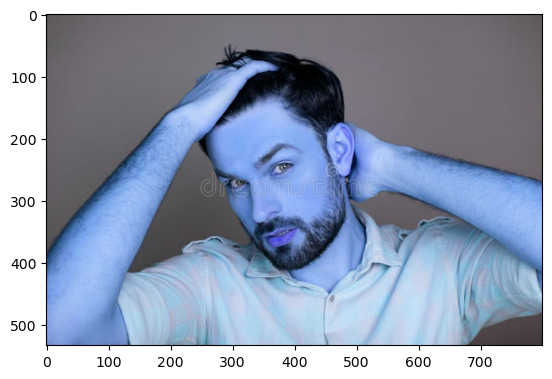

In [10]:
import matplotlib.pyplot as plt
plt.imshow(img)

1/1 [==============================] - 0s 54ms/step


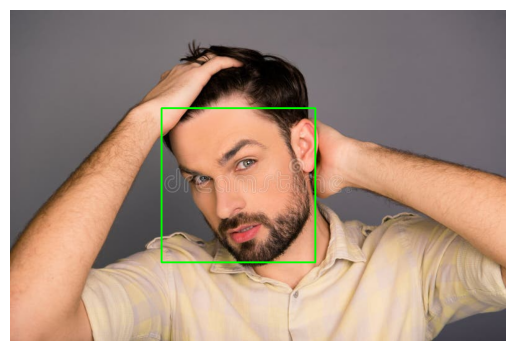

In [41]:
from mtcnn import MTCNN
import cv2
from matplotlib import pyplot as plt

def detect_faces_mtcnn(image_path):
    # Load image
    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

    # Initialize MTCNN detector
    detector = MTCNN()

    # Detect faces
    faces = detector.detect_faces(img)

    # Draw rectangles around faces
    res = []
    for face in faces:
        x, y, width, height = face['box']
        edge_length = max(width, height) 
        x_center = x + width // 2
        y_center = y + height // 2
        x_new = max(0, x_center - edge_length // 2)
        y_new = max(0, y_center - edge_length // 2)
        #plt.imshow(cv2.rectangle(img, (x_new, y_new), (x_new + edge_length, y_new + edge_length), (0, 255, 0), 2))
        #plt.axis("off")
        #plt.show()
        face_square = img[y_new:y_new+height, x_new:x_new+width]
        res.append(face_square)
    return res

# Example usage
image_path = 'portrait-handsome-bearded-man-combing-hair-fingers-170177884.jpeg'
faces = detect_faces_mtcnn(image_path)


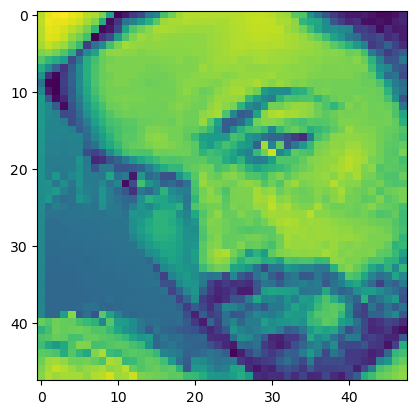

In [47]:
import cv2

def convert_to_grayscale_resize(img):
    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_img, (48, 48))
    normalized_img = resized_img / 255.0
    reshaped_img = normalized_img.reshape(48, 48, 1)

    return reshaped_img

plt.imshow(convert_to_grayscale_resize(face))
